In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
path = os.path.abspath(os.path.join(os.getcwd(), "../dataset_covid/sursaud/sursaud-covid19-quotidien-2020-03-30-19h03-departement.csv"))
df = pd.read_csv(path, sep=",")
df.fillna(0)

,dep,date_de_passage,sursaud_cl_age_corona,nbre_pass_corona,nbre_pass_tot,nbre_hospit_corona,nbre_pass_corona_h,nbre_pass_corona_f,nbre_pass_tot_h,nbre_pass_tot_f,nbre_hospit_corona_h,nbre_hospit_corona_f,nbre_acte_corona,nbre_acte_tot,nbre_acte_corona_h,nbre_acte_corona_f,nbre_acte_tot_h,nbre_acte_tot_f
0,01,2020-02-24,0,0.0,357.0,0.0,0.0,0.0,202.0,155.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01,2020-02-24,A,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,01,2020-02-24,B,0.0,155.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,01,2020-02-24,C,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01,2020-02-24,D,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21205,976,2020-03-29,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21206,976,2020-03-29,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21207,976,2020-03-29,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21208,976,2020-03-29,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.head()

,dep,date_de_passage,sursaud_cl_age_corona,nbre_pass_corona,nbre_pass_tot,nbre_hospit_corona,nbre_pass_corona_h,nbre_pass_corona_f,nbre_pass_tot_h,nbre_pass_tot_f,nbre_hospit_corona_h,nbre_hospit_corona_f,nbre_acte_corona,nbre_acte_tot,nbre_acte_corona_h,nbre_acte_corona_f,nbre_acte_tot_h,nbre_acte_tot_f
0,01,2020-02-24,0,0.0,357.0,0.0,0.0,0.0,202.0,155.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,01,2020-02-24,A,0.0,73.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01,2020-02-24,B,0.0,155.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01,2020-02-24,C,0.0,61.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01,2020-02-24,D,0.0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
import datetime
import numpy as np
dict_data = []
dict_data = df.to_dict()
my_data = {k: [dict_data[k][k1] for k1 in sorted(dict_data[k], key=lambda
x: float(x))] for k in dict_data}
my_data["date"] = [int(datetime.datetime.strptime(x, "%Y-%m-%d").timestamp()/(24*3600)) 
                   for x in my_data["date_de_passage"]]


In [22]:
print(my_data.keys())

dict_keys(['dep', 'date_de_passage', 'sursaud_cl_age_corona', 'nbre_pass_corona', 'nbre_pass_tot', 'nbre_hospit_corona', 'nbre_pass_corona_h', 'nbre_pass_corona_f', 'nbre_pass_tot_h', 'nbre_pass_tot_f', 'nbre_hospit_corona_h', 'nbre_hospit_corona_f', 'nbre_acte_corona', 'nbre_acte_tot', 'nbre_acte_corona_h', 'nbre_acte_corona_f', 'nbre_acte_tot_h', 'nbre_acte_tot_f', 'date'])


In [23]:
indexes_per_department = {}
index_age = {}
index_days = {}
for k in range(len(my_data["dep"])):
    dep = my_data["dep"][k]
    age = my_data["sursaud_cl_age_corona"][k]
    day = my_data["date"][k]
    if dep not in indexes_per_department:
        indexes_per_department[dep] = []
    indexes_per_department[dep] += [k]
    if age not in index_age:
        index_age[age] = []
    index_age[age] += [k]
    if day not in index_days:
        index_days[day] = []
    index_days[day] += [k]

In [24]:
print(index_age.keys())

dict_keys(['0', 'A', 'B', 'C', 'D', 'E'])


In [25]:
datas = ["nbre_pass_corona", "nbre_pass_tot", "nbre_hospit_corona", "date"]
import numpy as np
for d in datas:
    my_data[d+"_np"] = np.array(my_data[d])
indexes = [i for i in indexes_per_department["31"] if i in index_age["0"]]
dates_plot = [datetime.datetime.fromtimestamp((my_data["date_np"][ind]+1)*(24*3600)) for ind in indexes]

In [26]:
def nice_date(ax, dates, indexes):
    ax.set_xticks(dates)
    ax.set_xticklabels([str(date.day)+'/'+str(date.month)+"/2020" for date in dates])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

In [27]:
for department in indexes_per_department:
    # departement_of_interest = '68'
    sex = 0
    indexes = [i for i in indexes_per_department[department] if i in index_age["0"]]
    try:
        fig, ax = plt.subplots(1, figsize=(8, 8))
        for data_of_interest in ["nbre_pass_corona", "nbre_pass_tot", "nbre_hospit_corona"]:
            ax.plot(dates_plot, 
                    my_data[data_of_interest+"_np"][indexes],                  
                    label=data_of_interest)
        ax.set_xlabel('date')
        ax.set_ylabel('nb people')
        ax.set_title("Evolution of sursaud  : "+str(department))
        ax.legend()
        nice_date(ax, dates_plot, indexes)
        fig.savefig("../images_mess/"+str(department)+"_sursaud_data.png")
    except:
        pass
    plt.close('all')
    #ax.set_yscale('log')
    #plt.show()

In [34]:
datas = ["nbre_pass_corona", "nbre_pass_tot", "nbre_hospit_corona"]
aggregated_data = {}
sex = 0
for d in datas:
    k = list(index_days.keys())[0]
    aggregated_data[d] = np.array([np.sum(np.nan_to_num(my_data[d+"_np"][[p for p in index_days[k] if p in index_age["0"]]]))                                     for k in sorted(index_days)])
    print(d, aggregated_data[d])
for d in datas:
    aggregated_data["ratio_"+d] = (aggregated_data[d][1:]-aggregated_data[d][:-1])/aggregated_data[d][:-1]
    print("growth ratio", d,  aggregated_data["ratio_"+d])
for d in datas:
    aggregated_data["gratio_"+d] = (aggregated_data[d][2:]-aggregated_data[d][1:-1])/(
                                    aggregated_data[d][1:-1]-aggregated_data[d][:-2])
    print("ratio delta_n+1/delta_n", d,  aggregated_data["gratio_"+d])

nbre_pass_corona [1.000e+00 1.000e+00 0.000e+00 1.900e+01 3.100e+01 3.500e+01 3.900e+01
 1.110e+02 1.510e+02 2.450e+02 3.150e+02 3.240e+02 3.160e+02 2.910e+02
 5.120e+02 5.710e+02 7.880e+02 9.840e+02 1.242e+03 1.176e+03 1.346e+03
 1.937e+03 2.023e+03 2.375e+03 2.372e+03 2.855e+03 2.660e+03 2.786e+03
 4.482e+03 4.309e+03 4.304e+03 4.447e+03 5.384e+03 4.652e+03 3.169e+03]
nbre_pass_tot [48476. 42649. 42034. 41677. 41803. 40782. 39146. 44863. 40704. 40132.
 40858. 40896. 40129. 39455. 44972. 40837. 40462. 41162. 37246. 35603.
 31658. 29850. 25193. 25395. 23919. 24087. 22897. 20761. 25440. 23315.
 22681. 22130. 24175. 23287. 15940.]
nbre_hospit_corona [0.000e+00 0.000e+00 0.000e+00 1.000e+00 6.000e+00 3.000e+00 2.100e+01
 5.100e+01 5.300e+01 5.600e+01 7.100e+01 1.110e+02 1.150e+02 1.250e+02
 1.650e+02 2.050e+02 2.300e+02 3.010e+02 4.360e+02 3.770e+02 4.190e+02
 5.770e+02 6.820e+02 7.140e+02 8.790e+02 1.073e+03 1.030e+03 1.099e+03
 1.851e+03 1.761e+03 1.808e+03 1.959e+03 2.334e+03 1.779e+03

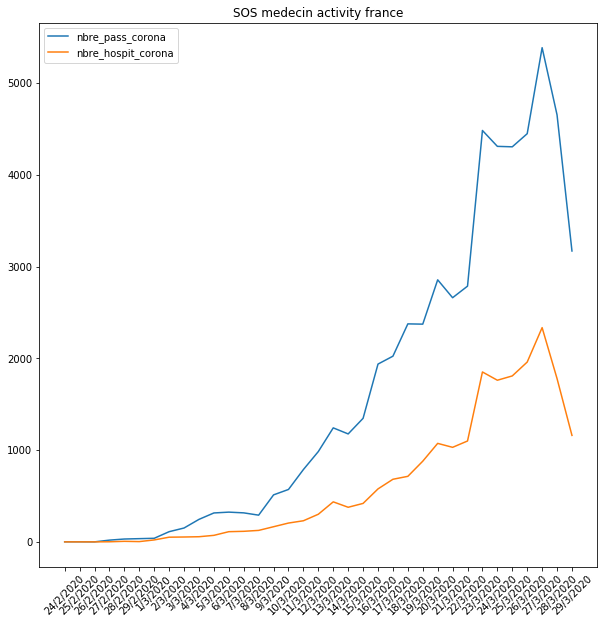

In [38]:
fig, ax = plt.subplots(1, figsize=(10,10))
indexes = [i for i in indexes_per_department["31"] if i in index_age["0"]]
for d in ["nbre_pass_corona", "nbre_hospit_corona"]:
    ax.plot(dates_plot, aggregated_data[d], label=d)
ax.set_title("SOS medecin activity france")
ax.legend()
fig.savefig("nb_passage_sursaud.png")
nice_date(ax, dates_plot, [])